In [3]:
import sys
import os

# Add the parent directory to Python path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Now import should work
import lightenplot as lp

In [4]:
"""
LightenPlot Error Handling - Usage Examples
============================================

This file demonstrates how to use the error handling system in LightenPlot.
"""

import pandas as pd
import numpy as np
import lightenplot as lp
from errors import (
    LightenPlotError,
    DataValidationError,
    ColumnNotFoundError,
    InvalidParameterError,
    DataValidator,
    handle_plot_errors,
    validate_inputs,
    PlotWarning,
    safe_plot
)


In [5]:
# ============================================================================
# EXAMPLE 1: Using DataValidator Class
# ============================================================================

def example1_data_validation():
    """Demonstrate manual data validation."""
    print("\n" + "="*60)
    print("EXAMPLE 1: Manual Data Validation")
    print("="*60)
    
    # Valid data
    df = pd.DataFrame({
        'x': [1, 2, 3, 4],
        'y': [10, 20, 30, 40]
    })
    
    try:
        # Validate DataFrame
        DataValidator.validate_dataframe(df, "Input data")
        print("DataFrame validation passed")
        
        # Validate columns exist
        DataValidator.validate_columns_exist(df, ['x', 'y'])
        print("Column validation passed")
        
        # Validate numeric data
        DataValidator.validate_numeric(df['x'], "X column")
        print("Numeric validation passed")
        
        # Validate range (e.g., alpha value)
        alpha = 0.7
        DataValidator.validate_range(alpha, 0.0, 1.0, "Alpha")
        print(f"Range validation passed (alpha={alpha})")
        
    except LightenPlotError as e:
        print(f"Validation failed: {e}")
    
    # Example of validation failure
    print("\n--- Testing validation failures ---")
    
    try:
        # This will fail - empty DataFrame
        empty_df = pd.DataFrame()
        DataValidator.validate_dataframe(empty_df, "Empty data")
    except DataValidationError as e:
        print(f"Caught expected error: {e}")
    
    try:
        # This will fail - column doesn't exist
        DataValidator.validate_columns_exist(df, ['x', 'z'])
    except ColumnNotFoundError as e:
        print(f"Caught expected error: {e}")


# ============================================================================
# EXAMPLE 2: Using Decorators 
# ============================================================================

class CustomPlot:
    """Example custom plot class using error handling decorators."""
    
    def __init__(self, data):
        self.data = data
    
    @handle_plot_errors
    def create_with_validation(self, x, y):
        """Create plot with automatic error handling."""
        DataValidator.validate_dataframe(self.data, "Plot data")
        DataValidator.validate_columns_exist(self.data, [x, y])
        print(f"Creating plot with x={x}, y={y}")
        return self


def example2_decorator_usage():
    """Demonstrate decorator-based error handling."""
    print("\n" + "="*60)
    print("EXAMPLE 3: Using @handle_plot_errors Decorator")
    print("="*60)
    
    df = pd.DataFrame({
        'age': [25, 30, 35],
        'salary': [50000, 60000, 70000]
    })
    
    plot = CustomPlot(df)
    
    # This works
    try:
        plot.create_with_validation('age', 'salary')
        print("Plot created successfully")
    except LightenPlotError as e:
        print(f"Error: {e}")
    
    # This fails gracefully
    print("\n--- Testing with invalid column ---")
    try:
        plot.create_with_validation('age', 'invalid_column')
    except LightenPlotError as e:
        print(f"Caught error (as expected): {e}")


# ============================================================================
# EXAMPLE 3: Input Validation Decorator
# ============================================================================

class AdvancedPlot:
    """Example using input validation decorator."""
    
    @validate_inputs(
        x=lambda col: isinstance(col, str),
        y=lambda col: isinstance(col, str),
        alpha=lambda val: 0.0 <= val <= 1.0,
        size=lambda val: val > 0 if val is not None else True
    )
    def create_scatter(self, x, y, alpha=0.7, size=50):
        """Create scatter with validated inputs."""
        print(f"Creating scatter: x={x}, y={y}, alpha={alpha}, size={size}")
        return self


def example3_input_validation():
    """Demonstrate input validation decorator."""
    print("\n" + "="*60)
    print("EXAMPLE 4: Input Validation Decorator")
    print("="*60)
    
    plot = AdvancedPlot()
    
    # Valid inputs
    try:
        plot.create_scatter('age', 'salary', alpha=0.7, size=100)
        print("Valid inputs accepted")
    except InvalidParameterError as e:
        print(f"Error: {e}")
    
    # Invalid alpha value
    print("\n--- Testing invalid alpha ---")
    try:
        plot.create_scatter('age', 'salary', alpha=1.5)  # alpha > 1.0
    except InvalidParameterError as e:
        print(f"Caught error (as expected):\n{e}")
    
    # Invalid size value
    print("\n--- Testing invalid size ---")
    try:
        plot.create_scatter('age', 'salary', size=-10)  # size <= 0
    except InvalidParameterError as e:
        print(f"Caught error (as expected):\n{e}")


# ============================================================================
# EXAMPLE 4: Warning System
# ============================================================================

def example4_warnings():
    """Demonstrate the warning system."""
    print("\n" + "="*60)
    print("EXAMPLE 5: Warning System")
    print("="*60)
    
    # Enable warnings
    PlotWarning.enable_warnings()
    
    # Issue some warnings
    PlotWarning.warn("Using default theme, consider applying a custom theme", "Theme")
    PlotWarning.warn("Large dataset detected, plot may take longer", "Performance")
    
    # Disable warnings
    print("\n--- Disabling warnings ---")
    PlotWarning.disable_warnings()
    PlotWarning.warn("This warning won't be shown", "Hidden")
    
    # Re-enable
    PlotWarning.enable_warnings()
    PlotWarning.warn("Warnings are back on!", "Info")


# ============================================================================
# EXAMPLE 5: Context Manager (safe_plot)
# ============================================================================

def example5_context_manager():
    """Demonstrate safe_plot context manager."""
    print("\n" + "="*60)
    print("EXAMPLE 6: Context Manager for Safe Plotting")
    print("="*60)
    
    df = pd.DataFrame({
        'x': [1, 2, 3],
        'y': [10, 20, 30]
    })
    
    # Safe operation that succeeds
    print("--- Safe operation ---")
    with safe_plot("Creating line plot"):
        print("Creating plot inside safe context...")
        plot = lp.line(df, x='x', y='y')
        print("Plot created successfully")
    
    # Safe operation that fails but is handled
    print("\n--- Operation with error (handled gracefully) ---")
    with safe_plot("Creating scatter with bad column"):
        # This will fail but won't crash the program
        result = 10 / 0  # Simulate an error


# ============================================================================
# EXAMPLE 6: Complete Real-World Scenario
# ============================================================================

def example6_real_world_scenario():
    """Demonstrate complete error handling in realistic scenario."""
    print("\n" + "="*60)
    print("EXAMPLE 7: Real-World Complete Scenario")
    print("="*60)
    
    def load_and_plot_data(filename, x_col, y_col):
        """Load data and create plot with comprehensive error handling."""
        try:
            # Simulate loading data
            print(f"Loading data from {filename}...")
            df = pd.DataFrame({
                'age': [25, 30, 35, 40, 45],
                'salary': [50000, 60000, 70000, 80000, 90000],
                'experience': [2, 5, 8, 12, 15]
            })
            
            # Validate data
            DataValidator.validate_dataframe(df, "Loaded data")
            print("Data loaded successfully")
            
            # Validate columns
            DataValidator.validate_columns_exist(df, [x_col, y_col])
            print(f"Columns '{x_col}' and '{y_col}' found")
            
            # Validate numeric
            DataValidator.validate_numeric(df[x_col], f"Column '{x_col}'")
            DataValidator.validate_numeric(df[y_col], f"Column '{y_col}'")
            print("Data is numeric")
            
            # Create plot
            with safe_plot("Creating scatter plot"):
                plot = lp.scatter(df, x=x_col, y=y_col, alpha=0.6)
                plot.set_title(f"{y_col} vs {x_col}")
                plot.set_labels(xlabel=x_col.title(), ylabel=y_col.title())
                print("Plot created successfully")
                
            return plot
            
        except ColumnNotFoundError as e:
            print(f"\n Column Error: {e}")
            return None
            
        except DataValidationError as e:
            print(f"\n Data Validation Error: {e}")
            return None
            
        except LightenPlotError as e:
            print(f"\n LightenPlot Error: {e}")
            return None
            
        except Exception as e:
            print(f"\n Unexpected Error: {e}")
            return None
    
    # Try valid scenario
    print("\n--- Scenario 1: Valid plot ---")
    plot1 = load_and_plot_data("data.csv", "age", "salary")
    
    # Try invalid column scenario
    print("\n--- Scenario 2: Invalid column ---")
    plot2 = load_and_plot_data("data.csv", "age", "invalid_col")
    
    # Try another valid scenario
    print("\n--- Scenario 3: Different columns ---")
    plot3 = load_and_plot_data("data.csv", "experience", "salary")



LIGHTENPLOT ERROR HANDLING EXAMPLES

EXAMPLE 1: Manual Data Validation
DataFrame validation passed
Column validation passed
Numeric validation passed
Range validation passed (alpha=0.7)

--- Testing validation failures ---
Caught expected error: LightenPlot Error: Empty data is empty
Suggestion: Ensure your DataFrame contains data before plotting
Caught expected error: LightenPlot Error: Column(s) not found: ['z']
Suggestion: Available columns: ['x', 'y']

EXAMPLE 3: Using @handle_plot_errors Decorator
Creating plot with x=age, y=salary
Plot created successfully

--- Testing with invalid column ---
Caught error (as expected): LightenPlot Error: Column(s) not found: ['invalid_column']
Suggestion: Available columns: ['age', 'salary']

EXAMPLE 4: Input Validation Decorator
Creating scatter: x=age, y=salary, alpha=0.7, size=100
Valid inputs accepted

--- Testing invalid alpha ---
Caught error (as expected):
LightenPlot Error: Validation failed for parameter 'alpha' with value 1.5
Suggesti

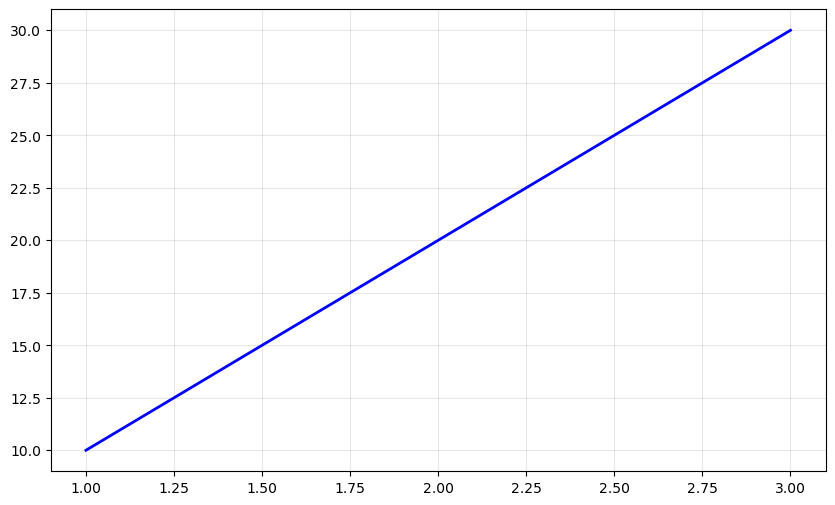

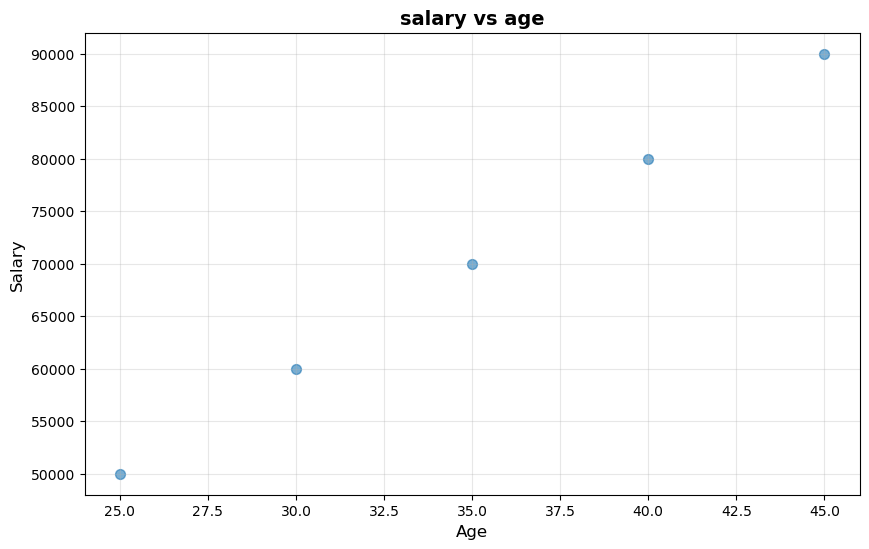

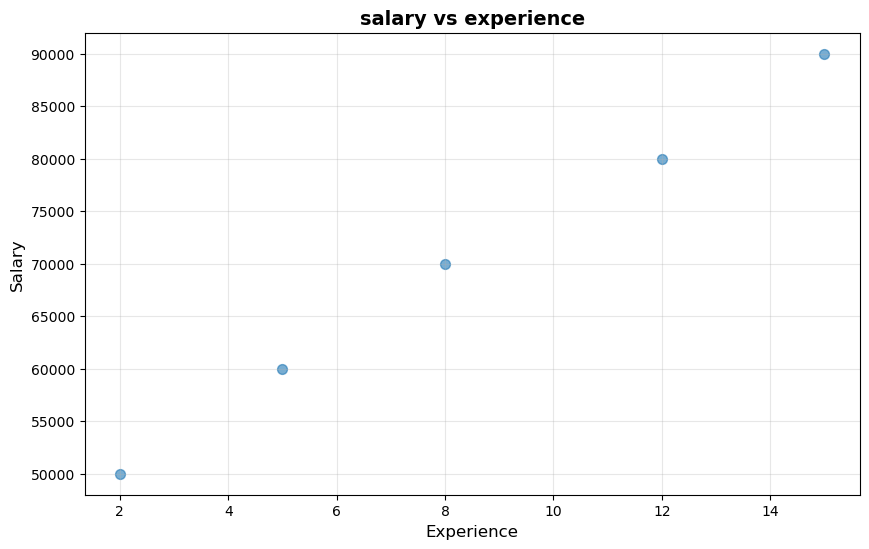

In [6]:
# ============================================================================
# RUN ALL EXAMPLES
# ============================================================================

def run_all_examples():
    """Run all error handling examples."""
    print("\n" + "="*70)
    print("LIGHTENPLOT ERROR HANDLING EXAMPLES")
    print("="*70)
    
    example1_data_validation()
    example2_decorator_usage()
    example3_input_validation()
    example4_warnings()
    example5_context_manager()
    example6_real_world_scenario()
    
    print("\n" + "="*70)
    print("ALL EXAMPLES COMPLETED")
    print("="*70)


if __name__ == "__main__":
    run_all_examples()